# EDA

### Importing necessary libraries

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles for readability
sns.set(style="whitegrid")

# Set options for pandas display
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


### Load the dataset

In [118]:

df = pd.read_csv('data/kepler_koi.csv')

# Display the first few rows to understand the data
print("Shape of dataset:", df.shape)
df.head(3)  # Show first 3 rows


Shape of dataset: (9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.5070,0.1160,-0.1160,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,0.000015,-0.000015,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.7822,0.0341,-0.0341,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436


### Redundant Columns and Missing Values

In [119]:
# Identify all columns with 'err' in their name (e.g., koi_period_err1, koi_period_err2, etc.)
error_columns = [col for col in df.columns if 'err' in col]

# Drop the identified error columns
df = df.drop(columns=error_columns)

# Verify that the error columns have been removed
print(f"Dropped columns: {len(error_columns)}")
print(f"Remaining columns after dropping errors: {len(df.columns)}")


Dropped columns: 22
Remaining columns after dropping errors: 27


In [31]:
# Check for missing values in each column
missing_data = df.isna().sum()

# Calculate the percentage of missing data
missing_percentage = (missing_data / len(df)) * 100

# Display columns with missing data
missing_info = pd.DataFrame({"Missing Values": missing_data, "Percentage": missing_percentage})
missing_info = missing_info[missing_info["Missing Values"] > 0].sort_values("Percentage", ascending=False)
missing_info


,Missing Values,Percentage
kepler_name,6817,71.277708
koi_score,1510,15.788373
koi_impact,363,3.795483
koi_depth,363,3.795483
koi_prad,363,3.795483
koi_teq,363,3.795483
koi_model_snr,363,3.795483
koi_srad,363,3.795483
koi_slogg,363,3.795483
koi_steff,363,3.795483


In [20]:
# Show basic summary statistics for numeric columns
df.describe()


,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,2.390000,0.520000,-0.300000,878.000000,NaN,NaN,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,1.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,-0.001240,0.889000,0.378000,-0.046000,6.276500,0.350000,-0.050800,1.473400e+03,49.500000,-9.600000,14.930000,2.320000,-0.140000,1379.000000,NaN,NaN,8.702900e+02,5.194150e+02,-5.160000e+00,78.000000,1.000000,6112.000000,174.000000,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,146

### Plots

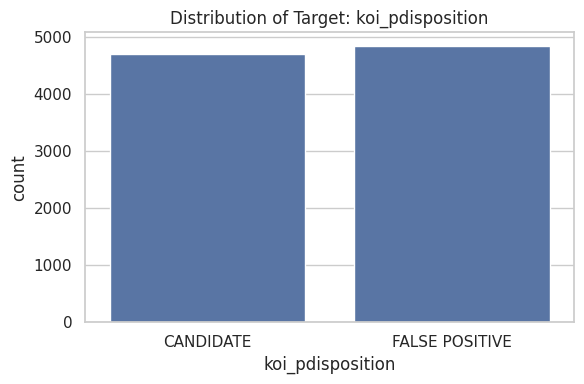

In [ ]:
# Plot the distribution of the target variable 'koi_pdisposition' (whether it's a candidate planet, false positive, etc.)
plt.figure(figsize=(6,4))
sns.countplot(x="koi_pdisposition", data=df)
plt.title("Distribution of Target: koi_pdisposition")
plt.tight_layout()
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_time0bk        9564 non-null   float64
 12  koi_impact         9201 non-null   float64
 13  koi_duration       9564 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_prad           9201 non-null   float64
 16  koi_teq            9201 

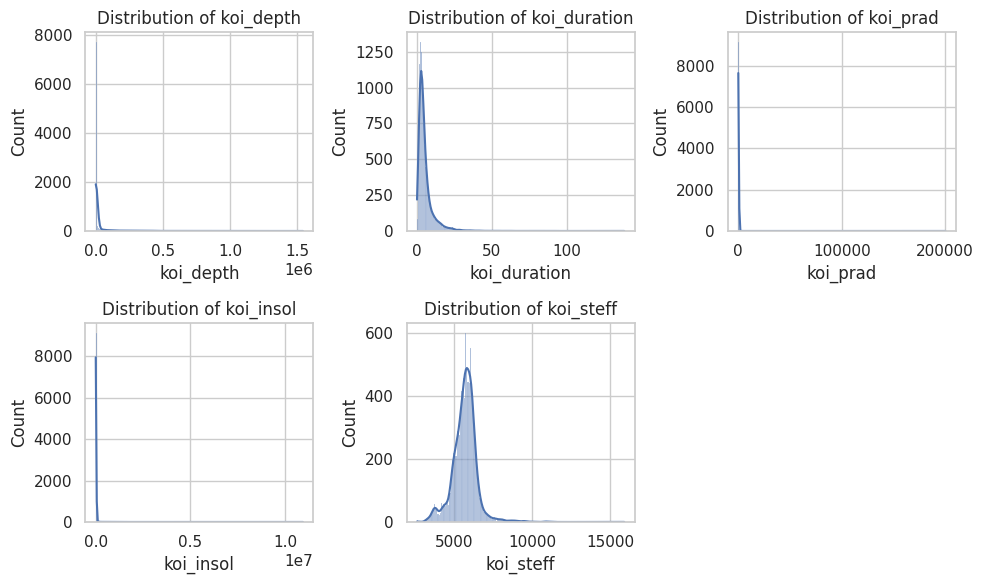

In [35]:
# Plot histograms for key numerical features to understand their distributions
key_feats = ["koi_depth", "koi_duration", "koi_prad", "koi_insol", "koi_steff"]  # Example features

plt.figure(figsize=(10,6))
for i, feat in enumerate(key_feats, 1):
    plt.subplot(2, 3, i)  # Create subplots in a 2x3 grid
    sns.histplot(df[feat].dropna(), kde=True)
    plt.title(f"Distribution of {feat}")
    
plt.tight_layout()
plt.show()


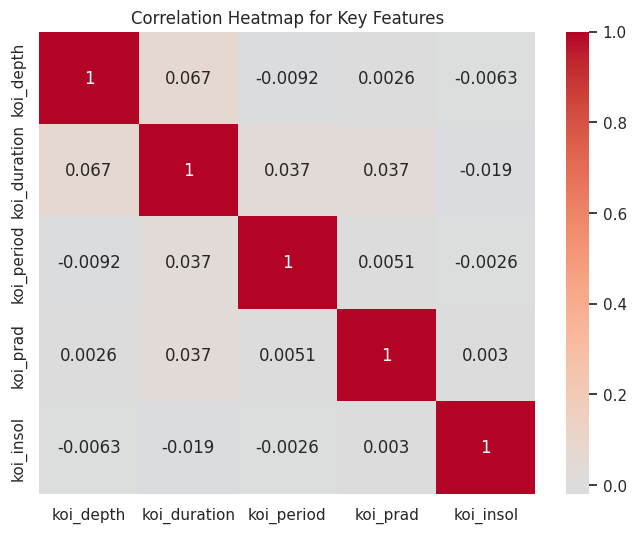

In [37]:
# Plot a correlation heatmap for key numerical features
corr_feats = ["koi_depth", "koi_duration", "koi_period", "koi_prad", "koi_insol"]
corr = df[corr_feats].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap for Key Features")
plt.show()


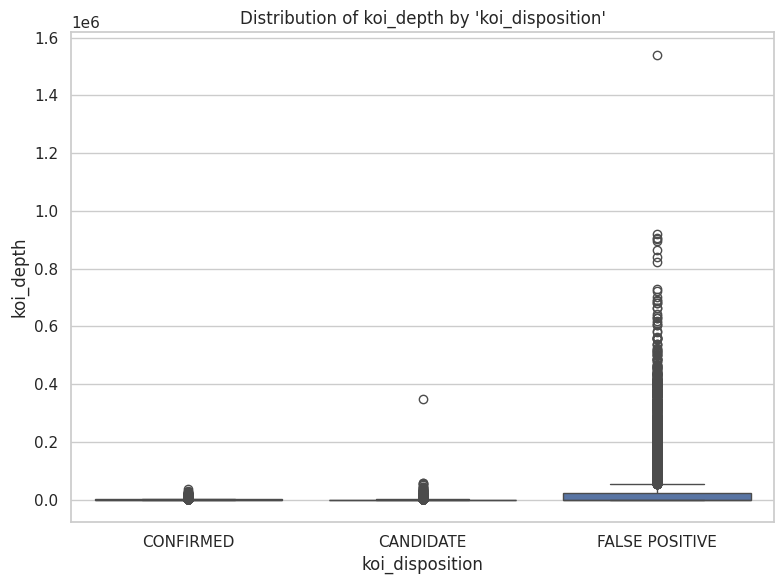

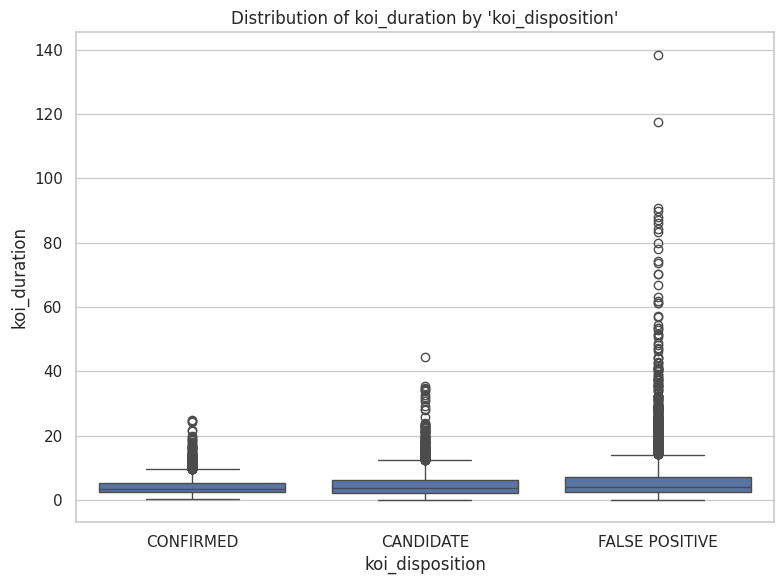

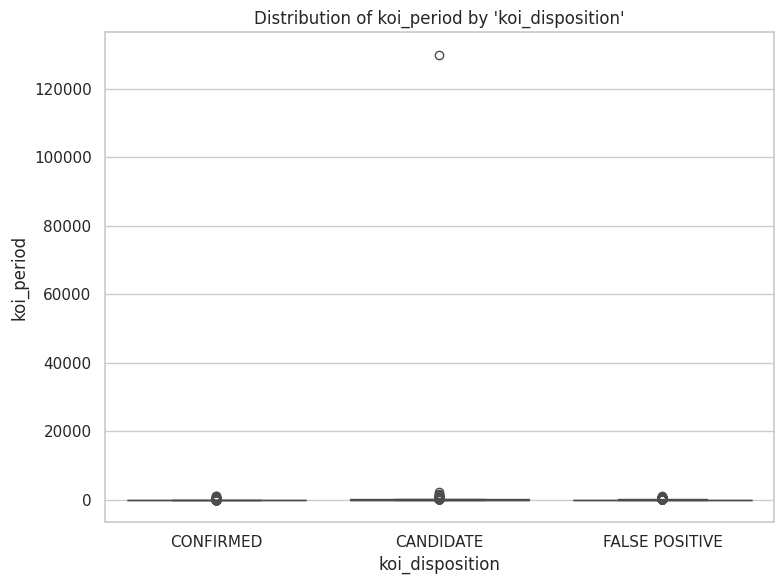

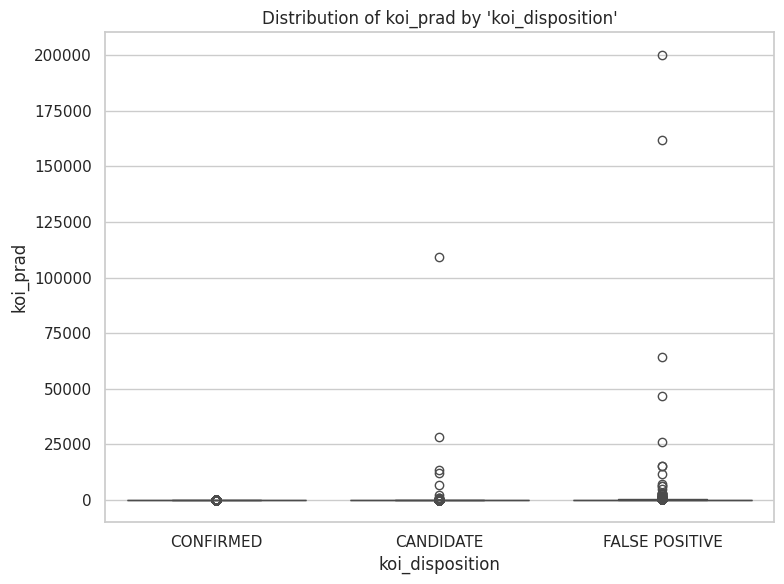

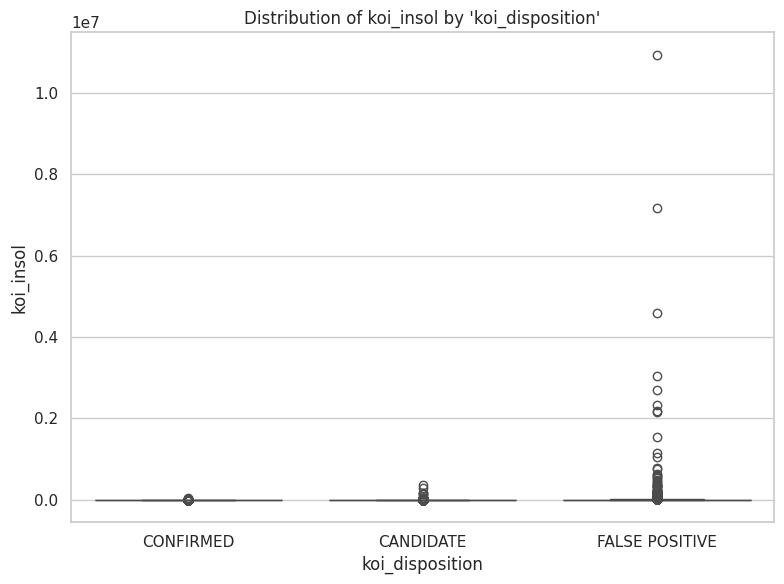

In [41]:
# Visualize how some key features relate to the target 'koi_pdisposition' (binary classification)
for feat in  corr_feats:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="koi_disposition", y=feat, data=df)
    plt.title(f"Distribution of {feat} by 'koi_disposition'")
    plt.tight_layout()
    plt.show()


In [42]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 0


# Preprocessing

### Missing Values Handling

In [120]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [121]:
drop_cols = ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_disposition', 'koi_tce_delivname']

df = df.drop(columns=drop_cols)

# Impute 'koi_score' (15.8% missing) with the median value, since it’s a continuous variable
df['koi_score'] = df['koi_score'].fillna(df['koi_score'].median())

# For features with less than 5% missing, use median imputation
features_to_impute = [
    'koi_impact', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_model_snr',
    'koi_srad', 'koi_slogg', 'koi_steff',
    'koi_insol', 'koi_kepmag'
]

for feature in features_to_impute:
    df[feature] = df[feature].fillna(df[feature].median())  # Impute with median

# Verify missing data after handling
print("\nMissing Data After Imputation/Dropping:")
missing_data_after = df.isna().sum()
missing_percentage_after = (missing_data_after / len(df)) * 100
print(pd.DataFrame({"Missing Values": missing_data_after, "Percentage": missing_percentage_after}).sort_values("Percentage", ascending=False))



Missing Data After Imputation/Dropping:
                  Missing Values  Percentage
koi_pdisposition               0         0.0
koi_score                      0         0.0
koi_fpflag_nt                  0         0.0
koi_fpflag_ss                  0         0.0
koi_fpflag_co                  0         0.0
koi_fpflag_ec                  0         0.0
koi_period                     0         0.0
koi_time0bk                    0         0.0
koi_impact                     0         0.0
koi_duration                   0         0.0
koi_depth                      0         0.0
koi_prad                       0         0.0
koi_teq                        0         0.0
koi_insol                      0         0.0
koi_model_snr                  0         0.0
koi_steff                      0         0.0
koi_slogg                      0         0.0
koi_srad                       0         0.0
ra                             0         0.0
dec                            0         0.0
koi_kepmag    

### Outliers Detection & Handling

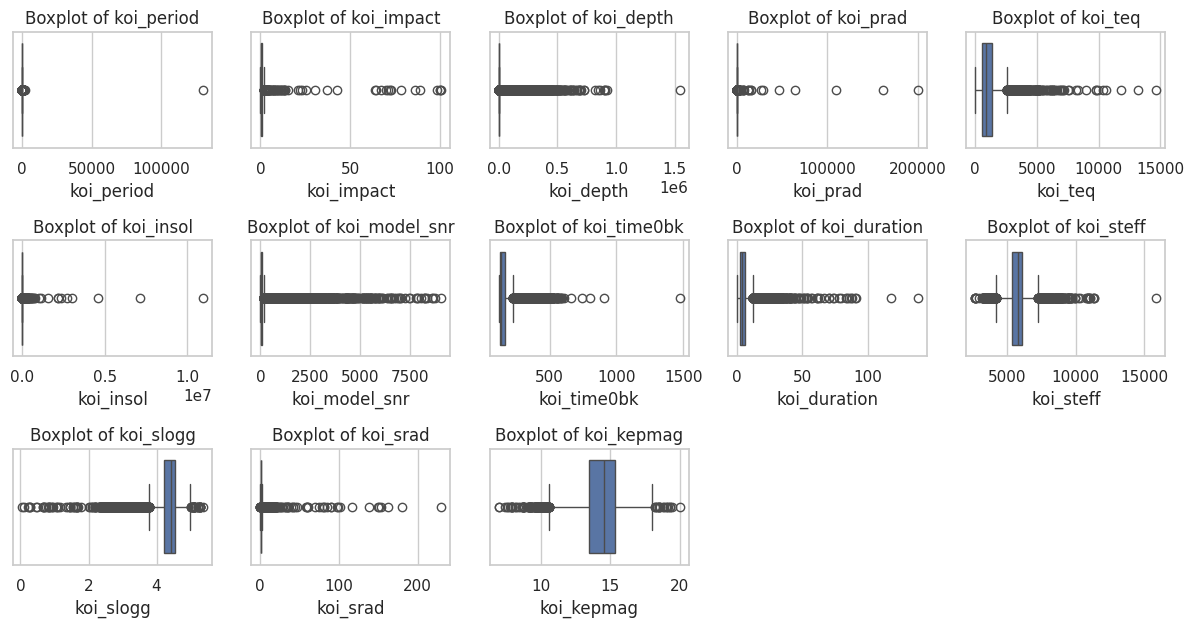

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check = ['koi_period', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_time0bk', 'koi_duration', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 5, i)  # 3 rows, 3 columns of plots
    sns.boxplot(data=df, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


In [123]:
# Apply clipping to all numeric columns (e.g., to the 90th percentile range)
def clip_outliers(df, columns):
    for col in columns:
        upper_limit = df[col].quantile(0.90)
        lower_limit = df[col].quantile(0.10)
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    return df

# Apply clipping for all numeric columns
df = clip_outliers(df, features_to_check)

# Check the result
df[features_to_check].describe()


,koi_period,koi_impact,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_time0bk,koi_duration,koi_steff,koi_slogg,koi_srad,koi_kepmag
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,45.172831,0.553444,6219.654800,11.627535,995.544228,784.531708,102.760230,155.990616,4.814389,5705.735257,4.359975,1.157542,14.322708
std,73.373613,0.370628,13886.318065,17.289553,537.173208,1270.832304,172.488353,34.576591,3.052455,491.731304,0.230855,0.450538,1.109416
min,0.977087,0.042000,74.930000,0.950000,327.000000,2.703000,8.600000,131.869260,1.635000,4859.000000,3.883000,0.711000,12.404000
25%,2.733684,0.209075,166.800000,1.430000,553.000000,22.160000,12.300000,132.761718,2.437750,5333.000000,4.232750,0.835750,13.440000
50%,9.752831,0.537000,421.100000,2.390000,878.000000,141.600000,23.000000,137.224595,3.792600,5767.000000,4.438000,1.000000,14.520000
75%,40.715178,0.877000,1341.775000,13.112500,1352.500000,806.797500,71.125000,170.694603,6.276500,6099.000000,4.539000,1.313000,15.322000
max,229.504732,1.165000,44550.200000,51.684000,2008.000000,3920.834000,556.020000,238.804476,11.297000,6419.000000,4.609000,2.169700,15.753000


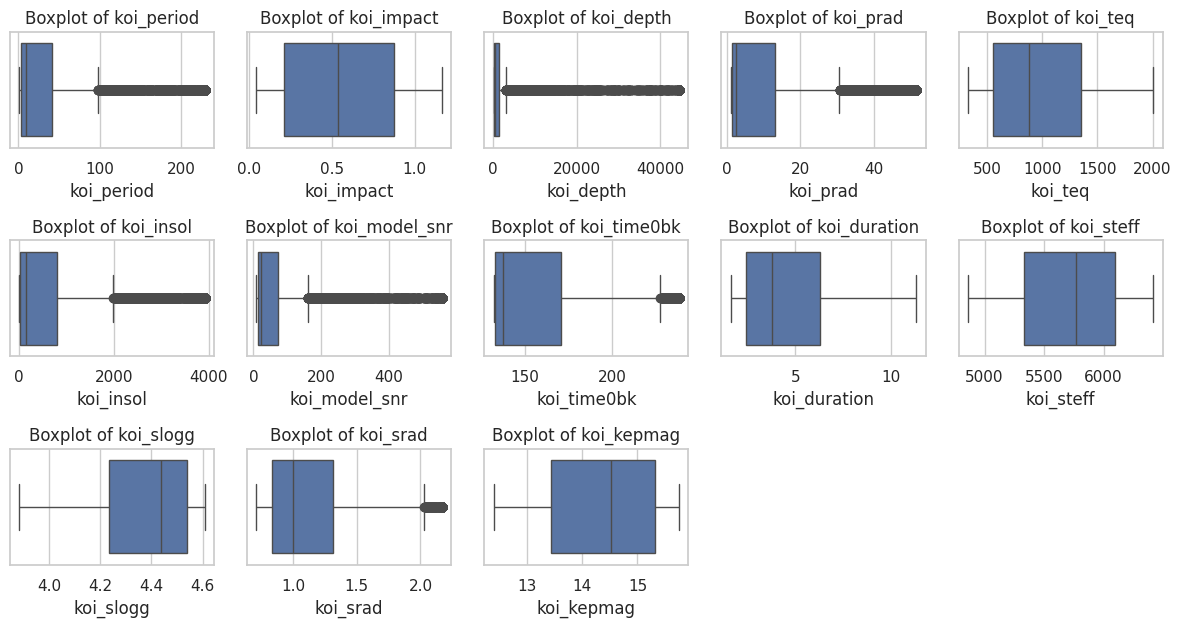

In [124]:
# Ater outlier clipping
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 5, i)  # 3 rows, 3 columns of plots
    sns.boxplot(data=df, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

### Feature Selection

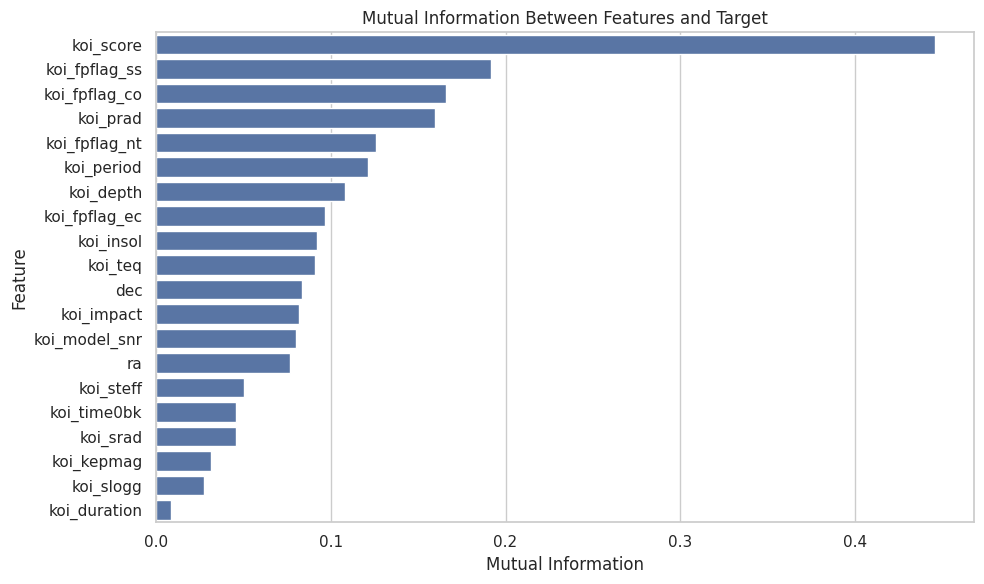

In [125]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the target is numeric (encoding categorical values)
df['koi_pdisposition'] = df['koi_pdisposition'].map({'FALSE POSITIVE': 0, 'CANDIDATE': 1})  # Encoding as 0, 1
y = df['koi_pdisposition']

# Ensure all features are numeric
X = df.drop(columns=['koi_pdisposition'])  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Force numeric conversion if needed (e.g., for any object columns)

# Calculate mutual information between features and target
mutual_info = mutual_info_classif(X, y)

# Create a pandas series to easily sort and plot
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Plot mutual information as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_series.values, y=mutual_info_series.index)
plt.title("Mutual Information Between Features and Target")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [127]:
features_to_drop = ['koi_duration', 'koi_kepmag', 'koi_slogg', 'koi_srad', 'koi_time0bk']

df = df.drop(columns=features_to_drop)

In [128]:
df.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,ra,dec
0,1,1.000,0,0,0,0,9.488036,0.146,615.8,2.26,793.0,93.59,35.8,5455.0,291.93423,48.141651
1,1,0.969,0,0,0,0,54.418383,0.586,874.8,2.83,443.0,9.11,25.8,5455.0,291.93423,48.141651
2,1,0.000,0,0,0,0,19.899140,0.969,10829.0,14.60,638.0,39.30,76.3,5853.0,297.00482,48.134129
3,0,0.000,0,1,0,0,1.736952,1.165,8079.2,33.46,1395.0,891.96,505.6,5805.0,285.53461,48.285210
4,1,1.000,0,0,0,0,2.525592,0.701,603.3,2.75,1406.0,926.16,40.9,6031.0,288.75488,48.226200


### Features Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to scale (excluding koi_fpflag_* and koi_score)
features_to_scale = [
    'koi_period', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 
    'koi_model_snr', 'koi_steff', 'ra', 'dec'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling (standardization) to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [130]:
# Check the normalized data (mean should be close to 0, std should be close to 1)
df[features_to_scale].describe()

,koi_period,koi_impact,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,ra,dec
count,9564.000000,9.564000e+03,9.564000e+03,9.564000e+03,9564.000000,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03
mean,0.000000,-1.842478e-16,9.509564e-17,4.754782e-17,0.000000,8.320869e-17,3.566087e-17,-7.726521e-17,1.895969e-15,-7.607651e-16
std,1.000052,1.000052e+00,1.000052e+00,1.000052e+00,1.000052,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-0.602370,-1.380011e+00,-4.425252e-01,-6.176038e-01,-1.244625,-6.152421e-01,-5.459218e-01,-1.722037e+00,-2.561141e+00,-2.008593e+00
25%,-0.578428,-9.291987e-01,-4.359090e-01,-5.898399e-01,-0.823882,-5.999309e-01,-5.244700e-01,-7.580456e-01,-7.131981e-01,-8.423255e-01
50%,-0.482760,-4.437045e-02,-4.175951e-01,-5.343122e-01,-0.218831,-5.059403e-01,-4.624335e-01,1.245964e-01,4.216215e-02,-3.691408e-02
75%,-0.060756,8.730394e-01,-3.512907e-01,8.589246e-02,0.664543,1.752155e-02,-1.834146e-01,7.997972e-01,7.970356e-01,8.064799e-01
max,2.512368,1.650139e+00,2.760455e+00,2.316923e+00,1.884883,2.468041e+00,2.627908e+00,1.450593e+00,2.026809e+00,2.367522e+00


In [131]:
df.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,ra,dec
0,1,1.000,0,0,0,0,-0.486369,-1.099392,-0.403573,-0.541832,-0.377075,-0.543721,-0.388222,-0.509930,-0.026421,1.202764
1,1,0.969,0,0,0,0,0.126013,0.087844,-0.384921,-0.508862,-1.028668,-0.610200,-0.446200,-0.509930,-0.026421,1.202764
2,1,0.000,0,0,0,0,-0.344470,1.121280,0.331952,0.171932,-0.665638,-0.586443,-0.153411,0.299498,1.037397,1.200675
3,0,0.000,0,1,0,0,-0.592013,1.650139,0.133919,1.262821,0.743665,0.084538,2.335583,0.201878,-1.369071,1.242630
4,1,1.000,0,0,0,0,-0.581264,0.398145,-0.404474,-0.513489,0.764143,0.111451,-0.358653,0.661503,-0.693454,1.226243


# Model Implementation

### Logistic Regression

Accuracy: 0.9164

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       941
           1       0.92      0.92      0.92       972

    accuracy                           0.92      1913
   macro avg       0.92      0.92      0.92      1913
weighted avg       0.92      0.92      0.92      1913



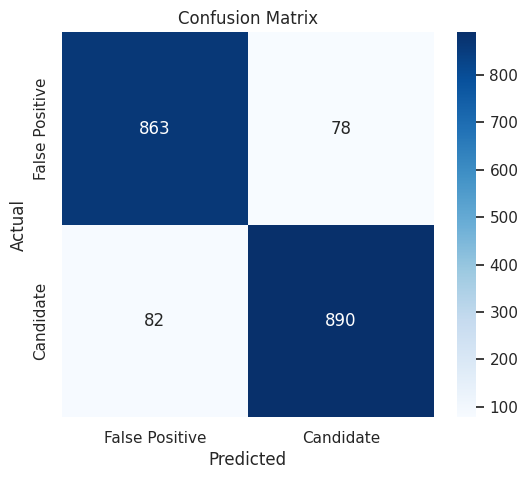

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split the data into features (X) and target (y)
X = df.drop(columns=['koi_pdisposition'])  # Drop the target column
y = df['koi_pdisposition']  # Target column

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_lg = model.predict(X_test)

# Step 5: Evaluate the model
# Accuracy
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f"Accuracy: {accuracy_lg:.4f}")

# Classification report (Precision, Recall, F1 Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lg))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["False Positive", "Candidate"], yticklabels=["False Positive", "Candidate"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### XGBoost

/home/moazzam/Documents/Windows/VS Code/Python/Hackathons/NASA Space Apps/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [05:48:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9869

XGBoost Classification Report:
                precision    recall  f1-score   support

False Positive       0.99      0.98      0.99       941
     Candidate       0.98      0.99      0.99       972

      accuracy                           0.99      1913
     macro avg       0.99      0.99      0.99      1913
  weighted avg       0.99      0.99      0.99      1913



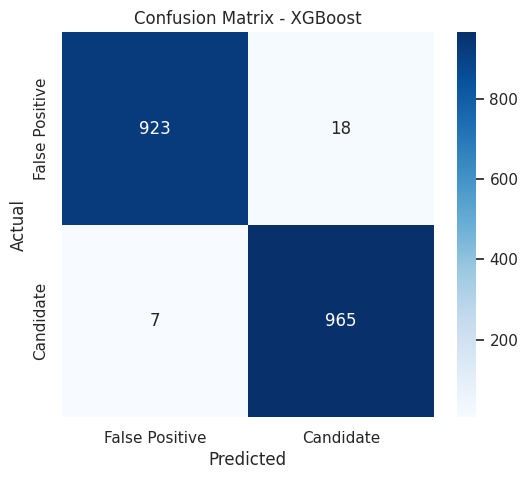

In [150]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the XGBoost model
model_xgb = xgb.XGBClassifier(
    objective="binary:logistic",  # binary classification
    eval_metric="logloss",  # evaluation metric
    use_label_encoder=False,  # avoid warning
    random_state=42
)

# Step 3: Train the model
model_xgb.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Step 5: Evaluate the model
# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["False Positive", "Candidate"]))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["False Positive", "Candidate"], yticklabels=["False Positive", "Candidate"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### LightGBM

[LightGBM] [Info] Number of positive: 3745, number of negative: 3906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2762
[LightGBM] [Info] Number of data points in the train set: 7651, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489478 -> initscore=-0.042092
[LightGBM] [Info] Start training from score -0.042092
LightGBM Accuracy: 0.9880

LightGBM Classification Report:
                precision    recall  f1-score   support

False Positive       0.99      0.98      0.99       941
     Candidate       0.98      0.99      0.99       972

      accuracy                           0.99      1913
     macro avg       0.99      0.99      0.99      1913
  weighted avg       0.99      0.99      0.99      1913



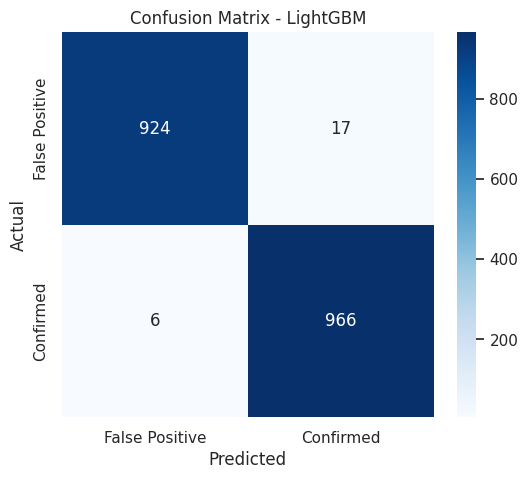

In [151]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the LightGBM model
model_lgbm = lgb.LGBMClassifier(
    objective="binary",  # binary classification
    metric="binary_logloss",  # evaluation metric
    random_state=42
)

# Step 3: Train the model
model_lgbm.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_lgbm = model_lgbm.predict(X_test)

# Step 5: Evaluate the model
# Accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")

# Classification report
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=["False Positive", "Candidate"]))

# Confusion matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot confusion matrix for LightGBM
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=["False Positive", "Confirmed"], yticklabels=["False Positive", "Confirmed"])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Comparison

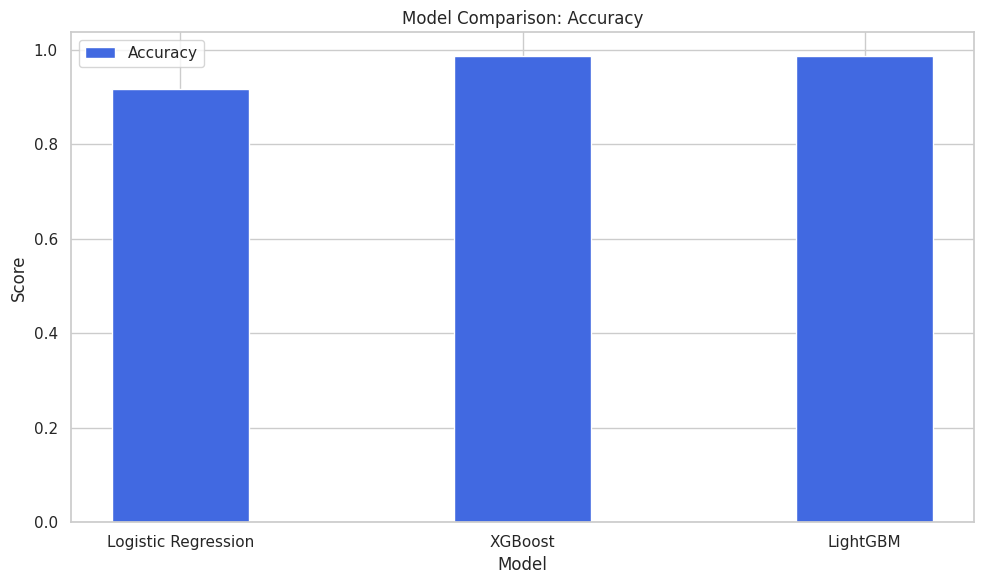

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the results for comparison (accuracy and f1-score for each model)
results = {
    'Logistic Regression': {
        'Accuracy': accuracy_lg,  # Use accuracy from Logistic Regression
    },
    'XGBoost': {
        'Accuracy': accuracy_xgb,  # Use accuracy from XGBoost
    },
    'LightGBM': {
        'Accuracy': accuracy_lgbm,  # Use accuracy from LightGBM
    }
}

# Prepare data for plotting
models = list(results.keys())
accuracy_values = [results[model]['Accuracy'] for model in models]

# Plot comparison of Accuracy and F1-score
plt.figure(figsize=(10, 6))
x = range(len(models))

# Bar plot for Accuracy and F1-Score comparison
plt.bar(x, accuracy_values, width=0.4, label='Accuracy', align='center', color='royalblue')

# Adding labels and titles
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
